In [1]:
import numpy as np
import pandas as pd

In [2]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [3]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
# Shape Of the Dataset
match.shape

(756, 18)

In [5]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,1.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,2.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,3.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,4.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1.0,5.0,DA Warner,S Dhawan,TS Mills,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,2.0,NaN,NaN,NaN


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [7]:
# Concise summary of the dataset
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [8]:
# Checking Null Values
match.isnull().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

DATA VISUALIZATION


Text(0.5, 1.0, 'Number of matches played in each IPL season')

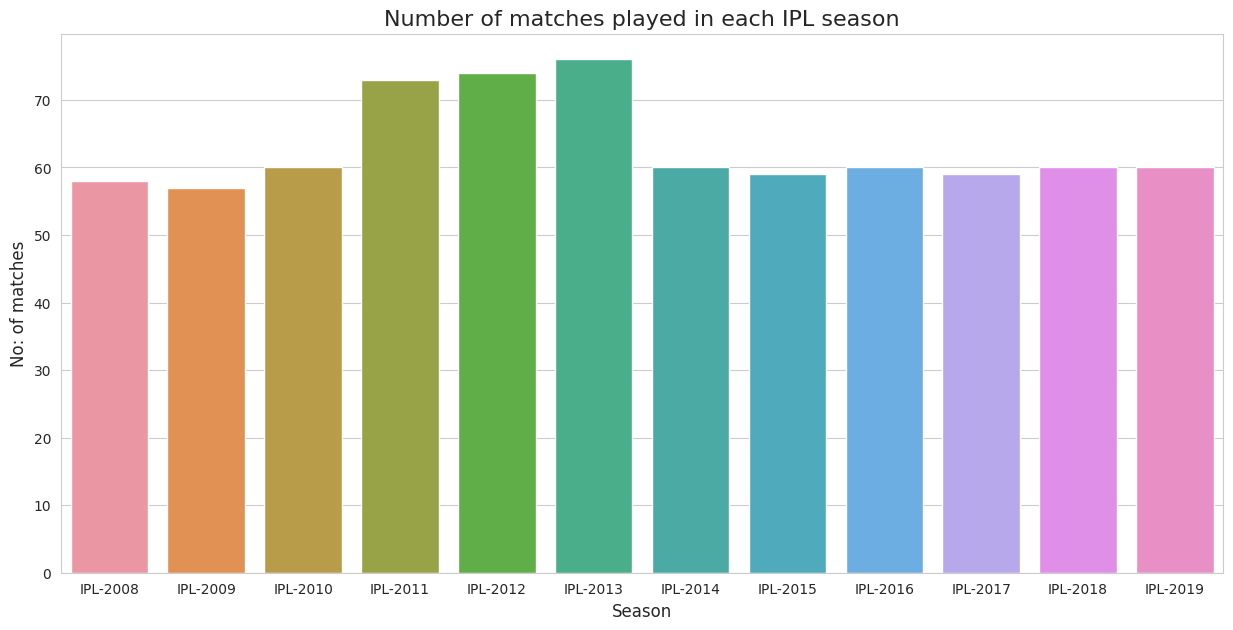

In [9]:
### Number of matches played in each IPL season
plt.figure(figsize=(15,7))
sns.countplot(x='Season',
              data=match,
              order = match['Season'].value_counts().index.sort_values()
              )
plt.xlabel('Season',fontsize=12)
plt.ylabel('No: of matches',fontsize=12)
plt.title('Number of matches played in each IPL season',fontsize=16)

Most number of matches were played in IPL-2013 Season

Text(0.5, 1.0, 'Matches won by the Teams')

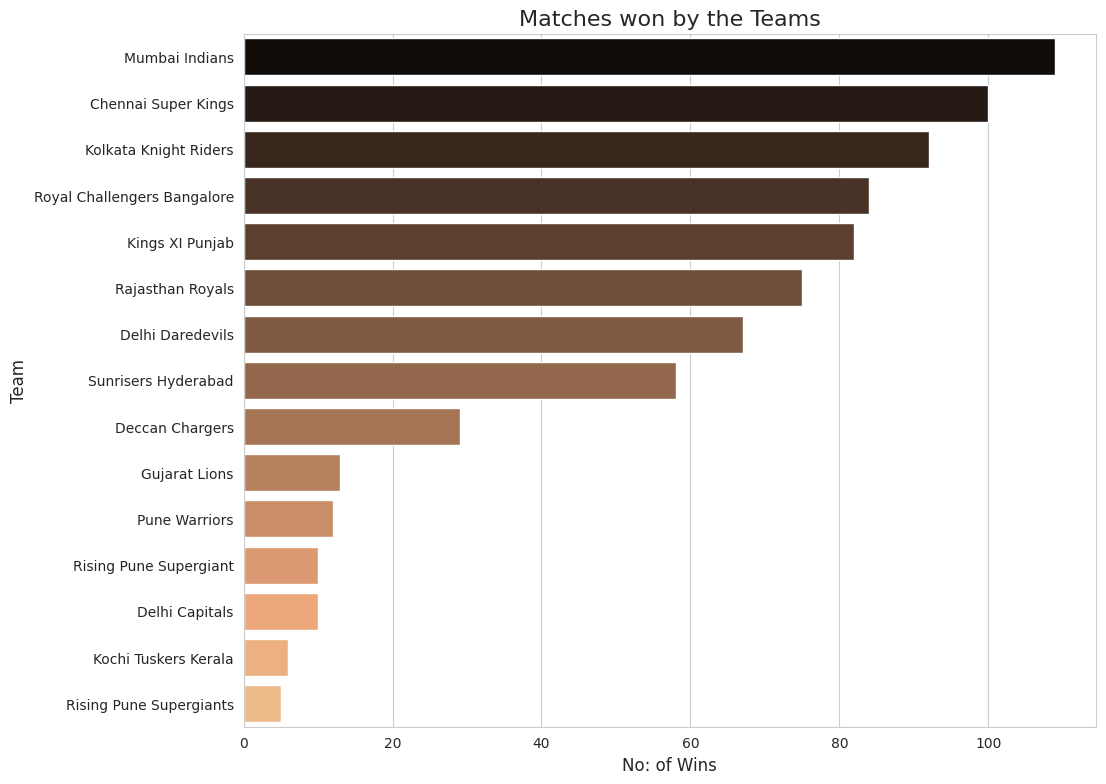

In [10]:
# Matches won by the Teams
plt.figure(figsize = (11,9))
sns.countplot(y = 'winner',
              data = match,
              order= match['winner'].value_counts().index,
              palette = 'copper' )
plt.xlabel('No: of Wins',fontsize=12)
plt.ylabel('Team',fontsize=12)
plt.title('Matches won by the Teams',fontsize=16)

Mumbai Indians won most number of matches followed by Chennai Super Kings

Text(0.5, 1.0, 'Number of matches played in each Stadium')

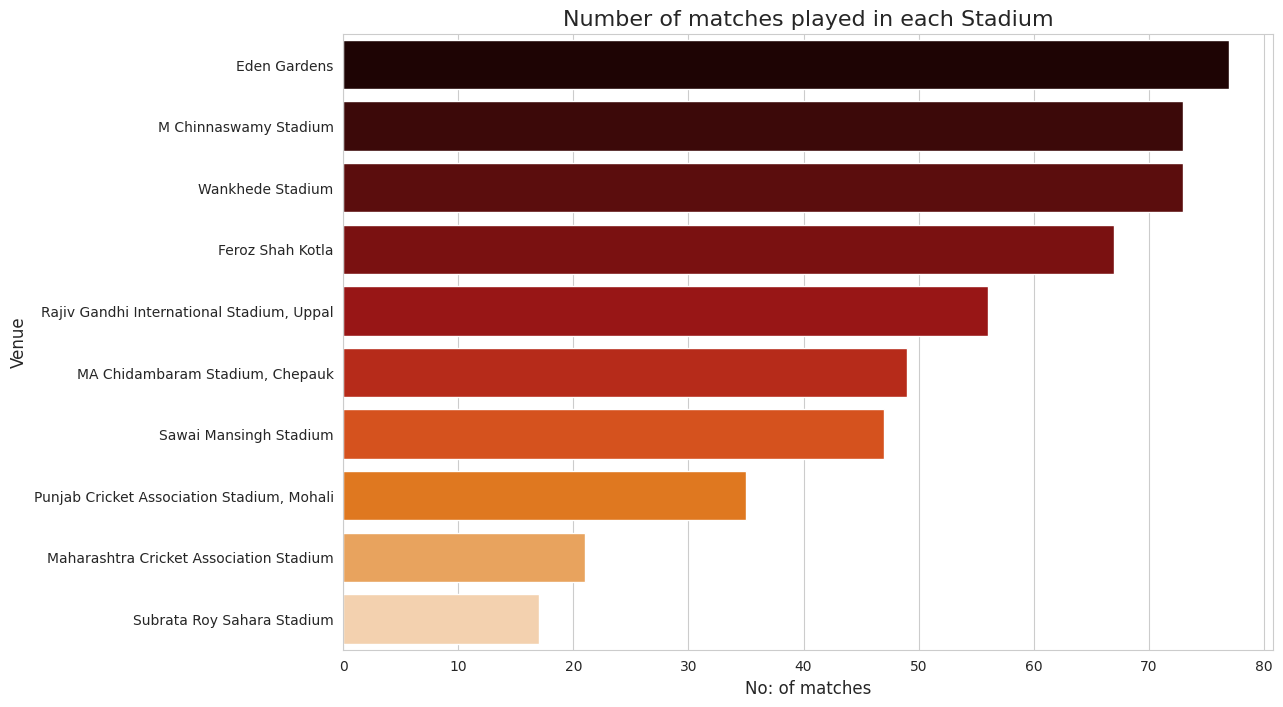

In [11]:
### No of matches played in stadium, Top 10
plt.figure(figsize = (12,8))
sns.countplot(y = 'venue',
              data = match,
              order = match['venue'].value_counts().iloc[:10].index,
              palette='gist_heat')
plt.xlabel('No: of matches',fontsize=12)
plt.ylabel('Venue',fontsize=12)
plt.title('Number of matches played in each Stadium',fontsize=16)

Most number of IPL matches were played in Eden Gardens Stadium, Kolkata

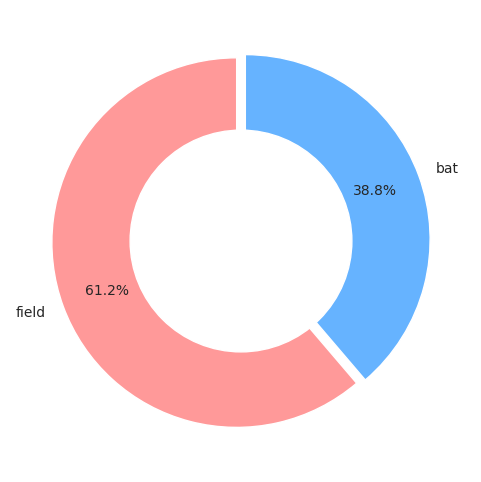

In [12]:
### Toss Decision
plt.figure(figsize=(6,6))
sizes = match.toss_decision.value_counts()
labels = match.toss_decision.value_counts().index
plt.pie(sizes,colors = ['#ff9999','#66b3ff'],
         labels=labels,
         autopct='%1.1f%%',
         startangle=90,
         pctdistance=0.75,
         explode = (0.025,0.025))

#draw white circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

In more than 61% of matches, teams chose to field after winning the toss

Text(0.5, 1.0, 'Decision to field or bat in each IPL season')

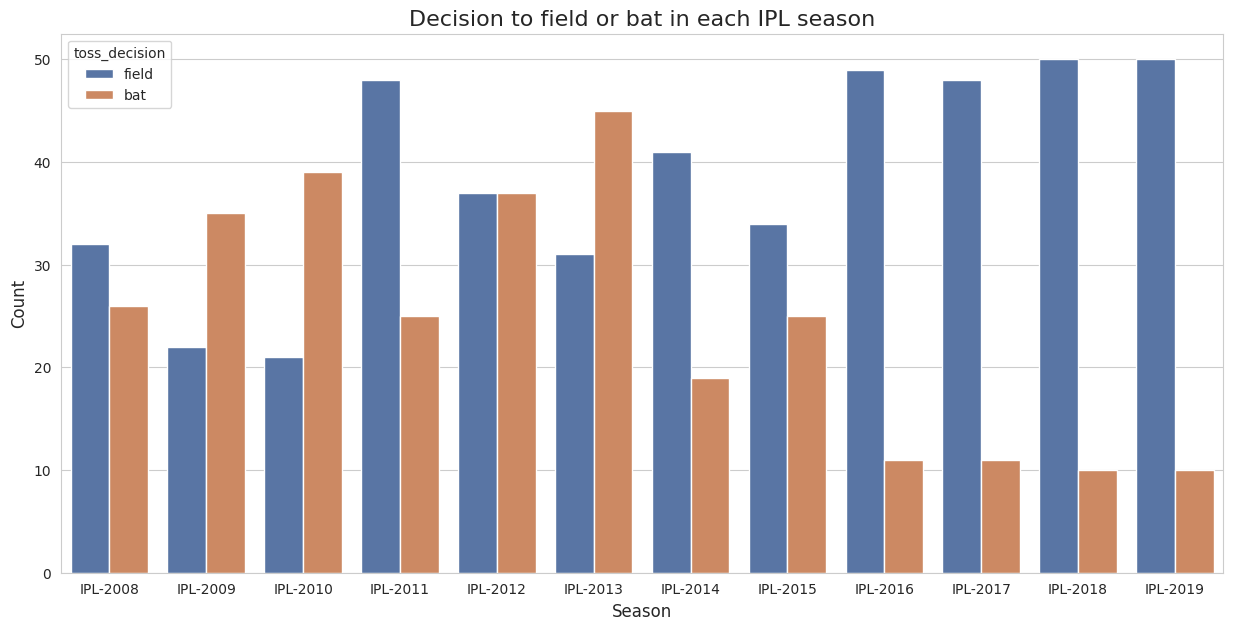

In [13]:
### Toss Decision to field or bat in each IPL season
plt.figure(figsize=(15,7))
sns.countplot(x='Season',
              hue='toss_decision',
              data=match,
              order = match['Season'].value_counts().index.sort_values(),
              palette='deep')
plt.xlabel('Season',fontsize=12)
plt.ylabel('Count',fontsize=12)
plt.title('Decision to field or bat in each IPL season', fontsize=16)

We can see a trend that, decisions to field are more from IPL-2016 Season

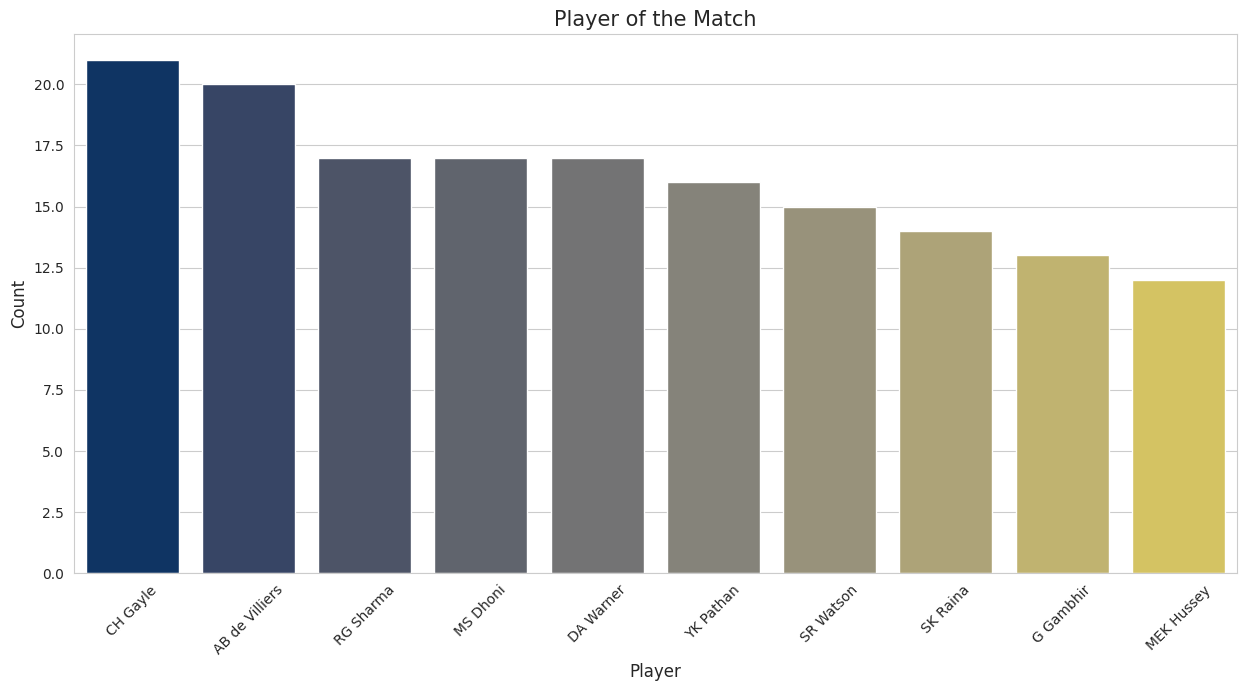

In [14]:
plt.figure(figsize=(15, 7))
player_of_match = match['player_of_match'].value_counts()[:10]

sns.barplot(x=player_of_match.index, y=player_of_match.values, palette='cividis')

plt.title("Player of the Match", fontsize=15)
plt.xlabel('Player', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate the x-axis labels if needed
plt.show()  # Display the plot

Chris Gayle won most Man of the Match Awards

In [15]:
total_score_df = delivery.groupby(['match_id', 'inning'])['total_runs'].sum().reset_index()


In [16]:
total_score_df = total_score_df[total_score_df['inning'] == 1]

In [17]:
total_score_df

,match_id,inning,total_runs
0,1,1,207.0
2,2,1,184.0
4,3,1,183.0
6,4,1,163.0
8,5,1,157.0
...,...,...,...
1312,7908,1,165.0
1314,7909,1,201.0
1316,7910,1,210.0
1318,7911,1,200.0


In [18]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [19]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207.0
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184.0
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183.0
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163.0
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
650,7908,IPL-2018,Jaipur,18-04-2018,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,7,N Rana,Sawai Mansingh Stadium,S Ravi,A.D Deshmukh,C Shamshuddin,7908,165.0
651,7909,IPL-2018,Mohali,19-04-2018,Kings XI Punjab,Sunrisers Hyderabad,Kings XI Punjab,bat,normal,0,Kings XI Punjab,15,0,CH Gayle,"Punjab Cricket Association IS Bindra Stadium, ...",Nigel Llong,Anil Chaudhary,Vineet Kulkarni,7909,201.0
652,7910,IPL-2018,Pune,20-04-2018,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,64,0,SR Watson,Maharashtra Cricket Association Stadium,Nitin Menon,K Ananthapadmanabhan,Rod Tucker,7910,210.0
653,7911,IPL-2018,Kolkata,21-04-2018,Kolkata Knight Riders,Kings XI Punjab,Kings XI Punjab,field,normal,1,Kings XI Punjab,0,9,KL Rahul,Eden Gardens,C Shamshuddin,A.D Deshmukh,S Ravi,7911,200.0


In [20]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants'],
      dtype=object)

In [21]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [22]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [23]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [24]:
match_df.shape

(540, 20)

In [25]:
match_df = match_df[match_df['dl_applied'] == 0]

In [26]:
match_df = match_df[['match_id','city','winner','total_runs']]

In [27]:
delivery_df = match_df.merge(delivery,on='match_id')

In [28]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [29]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125353,7910,Pune,Chennai Super Kings,210.0,2,Rajasthan Royals,Chennai Super Kings,18.0,5.0,S Gopal,...,0.0,0.0,0.0,0.0,2.0,0.0,2.0,NaN,NaN,NaN
125354,7910,Pune,Chennai Super Kings,210.0,2,Rajasthan Royals,Chennai Super Kings,18.0,6.0,S Gopal,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
125355,7910,Pune,Chennai Super Kings,210.0,2,Rajasthan Royals,Chennai Super Kings,19.0,1.0,JD Unadkat,...,0.0,0.0,0.0,0.0,4.0,0.0,4.0,NaN,NaN,NaN
125356,7910,Pune,Chennai Super Kings,210.0,2,Rajasthan Royals,Chennai Super Kings,19.0,2.0,JD Unadkat,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,JD Unadkat,bowled,NaN


In [30]:
delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']

<ipython-input-30-cafdf4636499>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  delivery_df['current_score'] = delivery_df.groupby('match_id').cumsum()['total_runs_y']


In [31]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [32]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [33]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,0.0,1.0,0.0,1.0,NaN,NaN,NaN,1.0,206.0,119.0
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,206.0,118.0
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,1.0,206.0,117.0
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,0.0,2.0,0.0,2.0,NaN,NaN,NaN,3.0,204.0,116.0
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,0.0,4.0,0.0,4.0,NaN,NaN,NaN,7.0,200.0,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125353,7910,Pune,Chennai Super Kings,210.0,2,Rajasthan Royals,Chennai Super Kings,18.0,5.0,S Gopal,...,0.0,2.0,0.0,2.0,NaN,NaN,NaN,144.0,66.0,13.0
125354,7910,Pune,Chennai Super Kings,210.0,2,Rajasthan Royals,Chennai Super Kings,18.0,6.0,S Gopal,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,144.0,66.0,12.0
125355,7910,Pune,Chennai Super Kings,210.0,2,Rajasthan Royals,Chennai Super Kings,19.0,1.0,JD Unadkat,...,0.0,4.0,0.0,4.0,NaN,NaN,NaN,148.0,62.0,11.0
125356,7910,Pune,Chennai Super Kings,210.0,2,Rajasthan Royals,Chennai Super Kings,19.0,2.0,JD Unadkat,...,0.0,0.0,0.0,0.0,JD Unadkat,bowled,NaN,148.0,62.0,10.0


In [34]:
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x:x if x == "0" else "1")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')
wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets'] = 10 - wickets
delivery_df.head()

<ipython-input-34-5cbb94c1e6d2>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.cumsum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  wickets = delivery_df.groupby('match_id').cumsum()['player_dismissed'].values


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,1.0,0.0,1.0,0,NaN,NaN,1.0,206.0,119.0,10
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,1.0,206.0,118.0,10
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,1.0,206.0,117.0,10
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,2.0,0.0,2.0,0,NaN,NaN,3.0,204.0,116.0,10
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,4.0,0.0,4.0,0,NaN,NaN,7.0,200.0,115.0,10


In [35]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,1.0,CH Gayle,...,1.0,0.0,1.0,0,NaN,NaN,1.0,206.0,119.0,10
126,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,2.0,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,1.0,206.0,118.0,10
127,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,3.0,Mandeep Singh,...,0.0,0.0,0.0,0,NaN,NaN,1.0,206.0,117.0,10
128,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,4.0,Mandeep Singh,...,2.0,0.0,2.0,0,NaN,NaN,3.0,204.0,116.0,10
129,1,Hyderabad,Sunrisers Hyderabad,207.0,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1.0,5.0,Mandeep Singh,...,4.0,0.0,4.0,0,NaN,NaN,7.0,200.0,115.0,10


In [36]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [37]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [38]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [39]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [40]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [41]:
final_df = final_df.sample(final_df.shape[0])

In [42]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
61404,Delhi Daredevils,Deccan Chargers,Delhi,9.0,14.0,5,157.0,8.377358,3.857143,1


In [ ]:
final_df.dropna(inplace=True)

In [43]:
final_df = final_df[final_df['balls_left'] != 0]

In [44]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [45]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
96376,Royal Challengers Bangalore,Chennai Super Kings,Ranchi,99.0,65.0,9,138.0,4.254545,9.138462
107616,Kolkata Knight Riders,Chennai Super Kings,Chennai,57.0,45.0,6,134.0,6.160000,7.600000
94690,Rajasthan Royals,Royal Challengers Bangalore,Bangalore,91.0,42.0,6,190.0,7.615385,13.000000
18454,Chennai Super Kings,Rajasthan Royals,Chennai,156.0,90.0,9,211.0,11.000000,10.400000
37105,Chennai Super Kings,Kings XI Punjab,Chennai,84.0,76.0,10,136.0,7.090909,6.631579
...,...,...,...,...,...,...,...,...,...
3998,Kings XI Punjab,Sunrisers Hyderabad,Chandigarh,91.0,39.0,6,207.0,8.592593,14.000000
50158,Royal Challengers Bangalore,Chennai Super Kings,Chennai,110.0,56.0,7,183.0,6.843750,11.785714
79017,Royal Challengers Bangalore,Mumbai Indians,Mumbai,114.0,43.0,5,194.0,6.233766,15.906977
41521,Kings XI Punjab,Kolkata Knight Riders,Kolkata,119.0,77.0,9,200.0,11.302326,9.272727


In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
]
,remainder='passthrough')

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [48]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [49]:
pipe.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [50]:
y_pred = pipe.predict(X_test)

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8162927394651875

In [52]:
pipe.predict_proba(X_test)[10]

array([0.87298377, 0.12701623])

In [53]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))


In [54]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)

    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]

    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target


In [55]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178.0


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4.0,0,65.5,34.5
10467,2,8.0,0,59.7,40.3
10473,3,1.0,0,67.1,32.9
10479,4,7.0,1,76.9,23.1
10485,5,12.0,0,67.1,32.9
10491,6,13.0,0,54.2,45.8
10497,7,9.0,0,47.8,52.2
10505,8,15.0,0,31.8,68.2
10511,9,7.0,0,29.4,70.6
10518,10,17.0,0,15.6,84.4


Text(0.5, 1.0, 'Target-178.0')

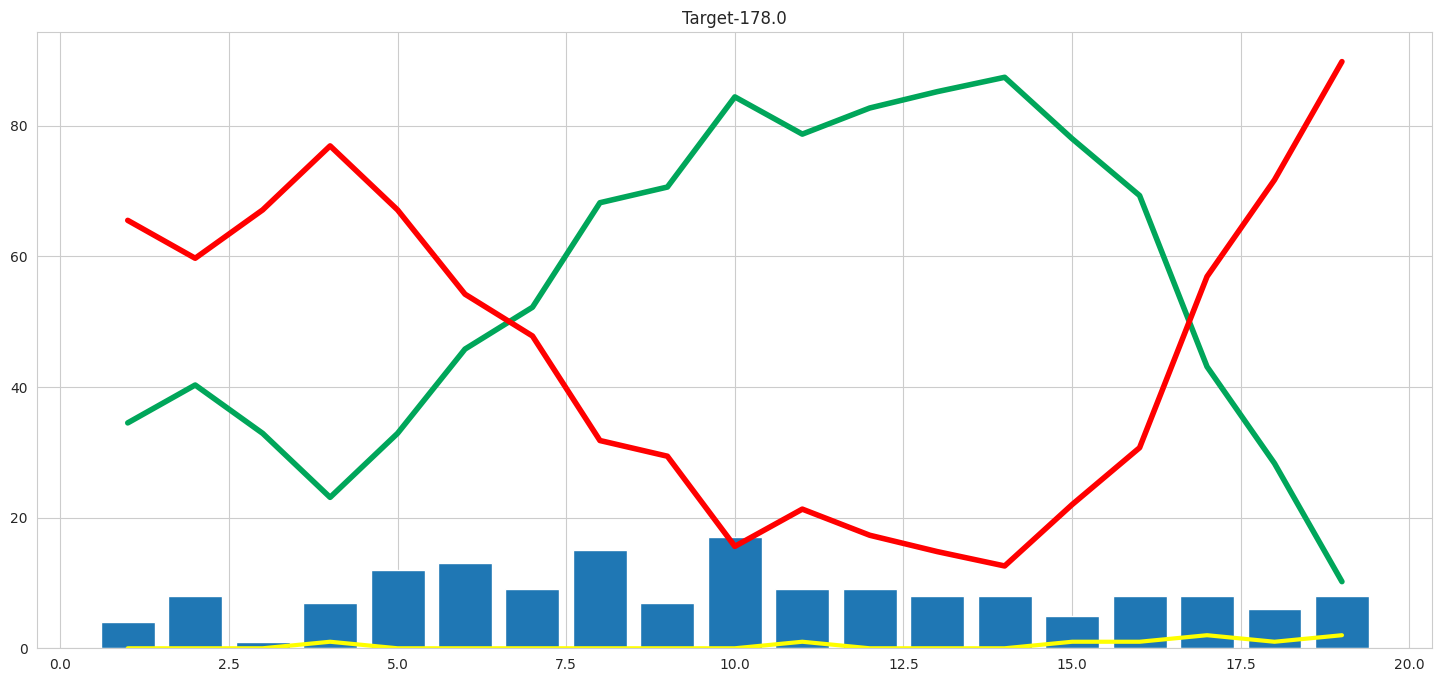

In [56]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [57]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [58]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [59]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))